## 1. Importation of required libraries:

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2. Loading Data:

In [2]:
## laoding training data:
train_dataframe = pd.read_csv('train.csv')
print('Dataframe uploaded successfully.')
train_dataframe.head(10)

Dataframe uploaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
## Loading test data:
test_dataframe = pd.read_csv('test.csv')
print('test data uploaded successfully.')
test_dataframe.head()

test data uploaded successfully.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Exploring Data:

In [4]:
train_dataframe.shape #form(row, column).

(891, 12)

In [5]:
test_dataframe.shape # excluding the output column.

(418, 11)

In [6]:
train_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# number of unique data in the dataset:
train_dataframe.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 4. Dealing with missing values:

In [8]:
## checking for missing data in training dataset:
train_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see Age, Cabin and Embarked columns consist of missing values whereas Cabin column consists of more than 50 %
missing values. So I will drop the Cabin column and the missing values of Age column will be replaced with
the mean value of Age. Embarked column can be filled with 'S'.

In [9]:
train_dataframe = train_dataframe.drop('Cabin', axis=1)
train_dataframe['Age'].fillna(train_dataframe['Age'].mean(), inplace=True)
train_dataframe.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
train_dataframe['Embarked'].fillna('S', inplace=True)

In [11]:
## checking for missing data:
train_dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# checking missing data in test dataset:
test_dataframe.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
test_dataframe = test_dataframe.drop('Cabin', axis=1)
test_dataframe['Age'].fillna(test_dataframe['Age'].mean(), inplace=True)
test_dataframe['Fare'].fillna(test_dataframe['Fare'].mean(), inplace=True)
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [14]:
test_dataframe.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 5. Data Visualization:

In [15]:
## Age and Sex

female = train_dataframe[train_dataframe['Sex'] == 'female']
percentage_female = sum(female['Survived'])/len(female)
print('% of female survived: ',percentage_female)
male = train_dataframe[train_dataframe['Sex'] == 'male']
percentage_male = sum(male['Survived'])/len(male)
print('% of male survived: ',percentage_male)

% of female survived:  0.7420382165605095
% of male survived:  0.18890814558058924


Text(0.5, 1.0, 'Female')

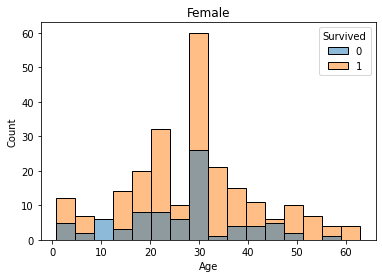

In [16]:
plot_female = sns.histplot(female, x = 'Age', hue = "Survived")
plot_female.set_title('Female')

Text(0.5, 1.0, 'Male')

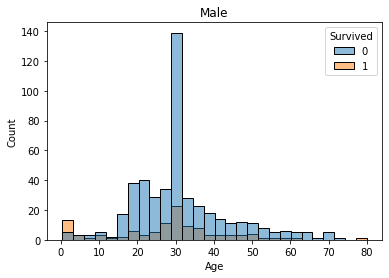

In [17]:
plot = sns.histplot(male, x = 'Age', hue = "Survived")
plot.set_title('Male')

Text(0.5, 1.0, 'Female')

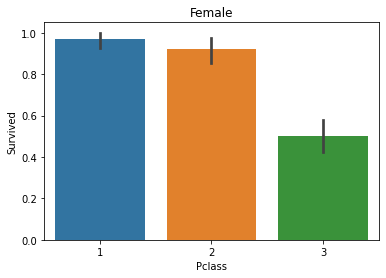

In [18]:
## Pclass and Sex:

plot_female = sns.barplot(x = 'Pclass', y = 'Survived', data=female)
plot_female.set_title('Female')

Text(0.5, 1.0, 'Male')

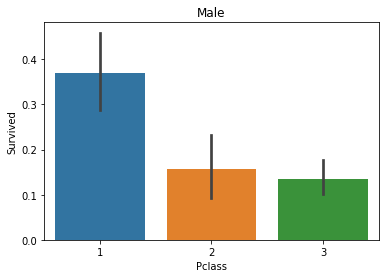

In [19]:
plot_male = sns.barplot(x = 'Pclass', y = 'Survived', data=male)
plot_male.set_title('Male')

<AxesSubplot:>

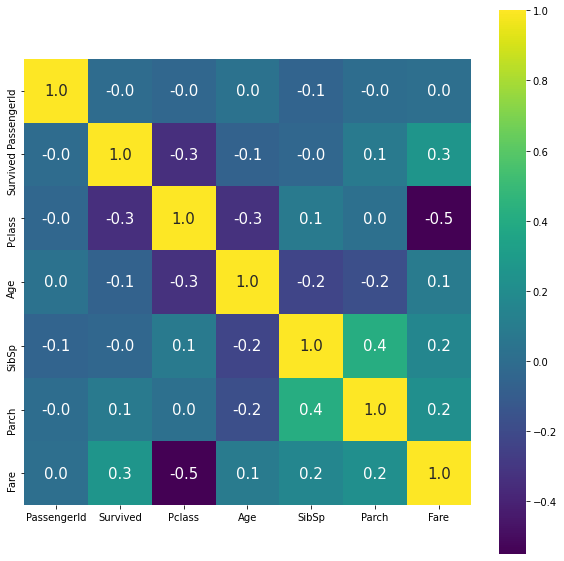

In [20]:
corr = train_dataframe.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15},cmap='viridis', linecolor="white")

## 6. Data Preprocessing:
As the Name, Sex and Ticket column will not contribute to train the model so these columns need to be dropped.

In [21]:
train_dataframe = train_dataframe.drop(['PassengerId', 'Name','Ticket'], axis=1)

# converting categorical Columns to numerical
train_dataframe.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [22]:
test_dataframe = test_dataframe.drop(['PassengerId', 'Name','Ticket'], axis=1)

# converting categorical Columns to numerical
test_dataframe.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


## 7. Splitting data:

In [23]:
X_train = train_dataframe.drop('Survived', axis=1)
y_train = train_dataframe['Survived']

In [24]:
X_test = test_dataframe

In [25]:
dataframe = pd.read_csv('gender_submission.csv')
y_test = dataframe['Survived']

## 8. Model training:
For training the model Logistic Regression is used here.

In [26]:
from sklearn.linear_model import LogisticRegression
# creating a linear regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 9. Model Prediction:

In [27]:
ytrain_pred = model.predict(X_train)

In [28]:
ytest_pred = model.predict(X_test)

## 10. Model Evaluation:

In [29]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(y_train, ytrain_pred)
print('Accuracy score on training data: ', training_data_accuracy)

test_data_accuracy = accuracy_score(y_test, ytest_pred)
print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on training data:  0.8047138047138047
Accuracy score on test data:  0.9425837320574163


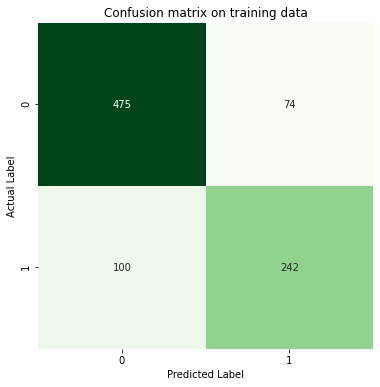

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, ytrain_pred)
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on training data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

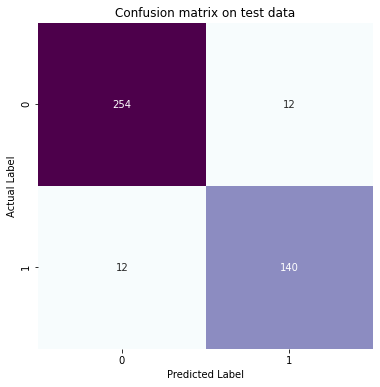

In [31]:
cm_test = confusion_matrix(y_test, ytest_pred)
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm_test, annot=True, fmt='d', cmap=plt.cm.BuPu, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [32]:
# Saving the training data in a csv file:
train_dataframe = pd.read_csv('train.csv')
dict = { 'PassengerId': train_dataframe['PassengerId'], 'Name' : train_dataframe['Name'], 'Sex' : train_dataframe['Sex'],'Actually Survived' : y_train, 'Predicted Survived' : ytrain_pred}
df = pd.DataFrame(dict)
df.to_csv('train_result.csv', index=False)

In [33]:
# Saving the test data in a csv file:
test_dataframe = pd.read_csv('test.csv')
dict = { 'PassengerId': test_dataframe['PassengerId'], 'Name' : test_dataframe['Name'], 'Sex' : test_dataframe['Sex'],'Actually Survived' : y_test, 'Predicted Survived' : ytest_pred}
df = pd.DataFrame(dict)
df.to_csv('test_result.csv', index=False)